<span style="font-size: 20pt;"><span style="font-weight: bold;">Chapter 6.</span>Accessing data on the World Wide Web using code</span>

Last update: 12 January 2024

Thank you for checking out the code for: 

> Hogan, Bernie (2023) _From Social Science to Data Science_. London, UK. Sage Publications. 

This notebook contains the code from the book, along with the headers and additional author notes that are not in the book as a way to help navigate the code. You can run this notebook in a browser by clicking the buttons below. 
    
The version that is uploaded to GitHub should have all the results pasted, but the best way to follow along is to clear all outputs and then start afresh. To do this in Jupyter go the menu and select "Kernel -> Restart Kernel and Clear all Outputs...". To do this on Google Colab go to the menu and select "Edit -> Clear all outputs".
    
The most up-to-date version of this code can be found at https://www.github.com/berniehogan/fsstds 

Additional resources and teaching materials can be found on Sage's forthcoming website for this book. 

All code for the book and derivative code on the book's repository is released open source under the  MIT license. 
    

[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/berniehogan/fsstds/main?filepath=chapters%2FCh.06.Accessing.ipynb)[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/berniehogan/fsstds/blob/main/chapters/Ch.06.Accessing.ipynb)

<span style="font-size: 20pt;">📺 YouTube Video lecture for this chapter 📺</span>

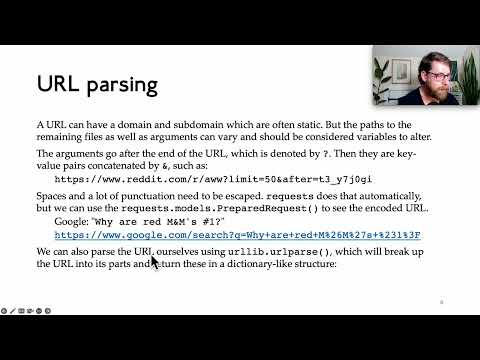

In [14]:
from IPython.display import YouTubeVideo

YouTubeVideo('YouGX0GT1GA')

# Accessing data I: Remote access of webpages

## What is a URL 

In [1]:
import socket 
import requests 

In [3]:
#1. External server IP
print("Example IP address for Google.com:", socket.gethostbyname("google.com"))

#2. Localhost IP
print("IP for localhost:", socket.gethostbyname("localhost"))

#3. Local network IP
local_ip = socket.gethostbyname(socket.gethostname())
print("My machine's IP Address on the local network:", local_ip)

#4. External computer IP: Actual IP commented for privacy
my_external_ip = requests.get('https://api.ipify.org').text
print("My machine's IP Address to others on the web:",
      my_external_ip.split('.')[0] + ".xxx.xxx.xxx")

Example IP address for Google.com: 142.250.200.46
IP for localhost: 127.0.0.1
My machine's IP Address on the local network: 192.168.0.152
My machine's IP Address to others on the web: 80.xxx.xxx.xxx


### IP Addresses and ethics 

## URL parsing 

In [4]:
URL = "https://www.google.com/search"
params = {"client":"firefox-b-d", "q":"Why are red M&M's #1?"}

req = requests.models.PreparedRequest()
req.prepare_url(URL, params)
print(req.url)

https://www.google.com/search?client=firefox-b-d&q=Why+are+red+M%26M%27s+%231%3F


## What is a web request 

In [5]:
req = requests.get(URL, params)

# The actual URL that is returned from the server based on what we sent.
print(req.request.url)

# The headers that we sent to the server
print(req.request.headers)

https://consent.google.com/ml?continue=https://www.google.com/search%3Fclient%3Dfirefox-b-d%26q%3DWhy%2Bare%2Bred%2BM%2526M%2527s%2B%25231%253F&gl=GB&m=0&pc=srp&uxe=none&cm=2&hl=en&src=1
{'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive', 'Cookie': 'AEC=Ae3NU9MMJqJezB3o6aX5sKb-CVvK73BaSZfwC69YSoA5swvCxn-k6NCvK-s; __Secure-ENID=17.SE=BileufnNsLZf_n9IU9KE6zoJxpWWHRyaJicEiXZyy4KfGZF2xXEAKlCihIHGhdpgr87UkjBZmCRIF28lRFv6ixJDhUWs5vU_IpASw9dd2aUiNDlTNGJp5k0e9AY33hwW28Z5GlDDsMBeVvWSVdVt3NJZXapoWbBqMHgLpJSA81c; CONSENT=PENDING+124'}


In [6]:
dict(req.headers).keys()

dict_keys(['Content-Type', 'Vary', 'Cache-Control', 'Pragma', 'Expires', 'Date', 'Cross-Origin-Resource-Policy', 'Content-Security-Policy', 'Permissions-Policy', 'Accept-CH', 'Cross-Origin-Opener-Policy', 'Content-Encoding', 'Server', 'X-XSS-Protection', 'X-Frame-Options', 'X-Content-Type-Options', 'Alt-Svc', 'Transfer-Encoding'])

In [7]:
print(req.content[4000:4500].decode('utf8'))

.signInButtonUIModernization {
  background-color: #fff;
  border: 1px solid #e5e5e5;
  color: #065fd4;
  }
.signInButtonUIModernization:focus-visible {
  background-color: #fff;
  border: 1px solid #065fd4;
  color: #065fd4;
}
.signInButtonUIModernization:hover {
  background-color: #f2f8ff;
  border: 1px solid transparent;
  color: #065fd4;
}
.signInButtonUIModernization:hover:focus-visible {
  background-color: #f2f8ff;
  border: 1px solid #065fd4;
  color: #065fd4;
}
.signInButtonUIModerniza


# An example web collection task using paging

In [8]:
import requests
import json

s = requests.Session()
s.headers.update({'User-agent': 'Python/Hogan redditex 0.3'})

req = s.get('https://api.reddit.com/r/aww/new')
sample = json.loads(req.content)

print(sample.keys(), sample['kind'], sample['data'].keys(),
      sep="\n")

dict_keys(['kind', 'data'])
Listing
dict_keys(['after', 'dist', 'modhash', 'geo_filter', 'children', 'before'])


In [9]:
import pandas as pd 

red_df = pd.json_normalize(sample['data']['children'])
print(red_df.info())
print(red_df.columns[:25])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Columns: 180 entries, kind to data.media_metadata.pj77qe7m7nbc1.id
dtypes: bool(31), float64(25), int64(12), object(112)
memory usage: 30.0+ KB
None
Index(['kind', 'data.approved_at_utc', 'data.subreddit', 'data.selftext',
       'data.author_fullname', 'data.saved', 'data.mod_reason_title',
       'data.gilded', 'data.clicked', 'data.title', 'data.link_flair_richtext',
       'data.subreddit_name_prefixed', 'data.hidden', 'data.pwls',
       'data.link_flair_css_class', 'data.downs', 'data.thumbnail_height',
       'data.top_awarded_type', 'data.hide_score', 'data.name',
       'data.quarantine', 'data.link_flair_text_color', 'data.upvote_ratio',
       'data.author_flair_background_color', 'data.subreddit_type'],
      dtype='object')


In [10]:
import time 

after = "" # The first time is empty (and won't throw an error on Reddit)
results = [] # The list of result objects
count = 0  # Where we start
max_count = 100 # Note: Reddit might not give results for maxcount > 1000

while True:
    reddit_link = f"https://api.reddit.com/r/aww?after={after}"

    content = s.get(reddit_link)
    if not content:
        break

    result = json.loads(req.content)
    results.append(result["data"]["children"])
    count += len(result["data"]["children"])

    if count >= max_count: 
        break 
    else:
        after = result["data"]["after"]

    time.sleep(2)

print(f"We have received {len(results)} batches of data to be processed.")

We have received 4 batches of data to be processed.


In [11]:
reddit_df = pd.concat([pd.json_normalize(i) for i in results],
                      ignore_index=True)

reddit_df.columns = [i.removeprefix("data.")
                    if i.startswith("data.") else i
                    for i in reddit_df.columns]

display(reddit_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 180 entries, kind to media_metadata.pj77qe7m7nbc1.id
dtypes: bool(31), float64(25), int64(12), object(112)
memory usage: 119.6+ KB


None

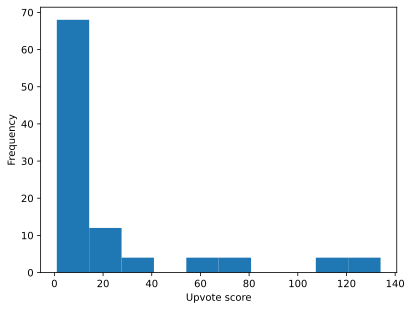

In [12]:
import matplotlib.pyplot as plt 
%config InlineBackend.figure_format = 'svg'

ax = reddit_df.ups.sort_values().plot(kind="hist"); 
ax.set_xlabel("Upvote score")

plt.show()

# Other web related issues to consider

## When to use your own versus someone else's program? 

## Are there ways to simulate a browser? 

# Ethical issues to consider 

## What is public data and how public?

## Considering data minimisation as a basic ethical principle 

### Volume

### Velocity

### Variety

# Summary

# Further Reading in ethics of data access and privacy

# Extensions and reflections 